# Simulate the Boutilier Coordination Game

In [55]:
from environment import Boutilier
from agent import RandomAgent, QLearner
from HystereticQLearner import HystereticQLearner
from policy import epsilon_greedy
from boltzmann import selection as softmax
from utils import simulate_task, find_greedy_action_for_state
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed()

# Rewards

In [56]:
def boutilier_factory(k, key):
    if(key == "part stochastic"):
        return Boutilier(k, True)
    elif (key == "deterministic"):
        return Boutilier(k, True)
    else:
        print("Unknown key")

In [57]:
%%time
exploration_rate = None
def discount_rate(_): return 0.9
def learning_rate(_): return 0.1
temperature_start = None  # Replace T = num with T = temperature_start maybe?
num_simulations = 200
policy = epsilon_greedy(0.05)

rewards = {}
rewards["deterministic"] = {}
rewards["part stochastic"] = {}
keys = ["part stochastic", "deterministic"]
# keys = ["part stochastic"]

# k_val = [-100, 0]
k_val = [-100, 0]

for key in keys:
#     print(key)
    for k in k_val:
        num_converge = 0
        num_six = 0
        learning_step = 10000
        timesteps = learning_step *2
        rewards_temp = np.zeros((num_simulations, learning_step))

        for i in range(num_simulations):
            print(i)
            if((i % 100) == 0):
                print("#------------------------#")
                print("| Simulation {}          |".format(i))
                print("#------------------------#")
                
            # build agents
            if(key == "part stochastic"):
                task = Boutilier(k, part_stochastic=True)
                decrease_rate = lambda _: 0.05
            else:
                task = Boutilier(k)
                decrease_rate = lambda _: 0.01
            
            agents = [HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy),
                      HystereticQLearner(task, exploration_rate, learning_rate, discount_rate, decrease_rate, 
                             policy=policy)]


            t = 0
            T = temperature_start
            for j in range(learning_step):
                agents[0].policy = policy
                agents[1].policy = policy
                
                if(key == "part stochastic"):
                    task = Boutilier(k, part_stochastic=True)
                else:
                    task = Boutilier(k)
                t, T = simulate_task(agents, task, t, T, timesteps=timesteps)
                
                # after each learning step, perform a greedy step
                if(key == "part stochastic"):
                    task = Boutilier(k, part_stochastic=True)
                else:
                    task = Boutilier(k)
                agents[0].accumulated_reward = 0
                
                agents[0].policy = epsilon_greedy(0)
                agents[1].policy = epsilon_greedy(0)
                _, _, acc_reward = simulate_task(agents, task, 0, None, timesteps=timesteps, update_agents=False, return_acc_reward=True)
#                 print(acc_reward)
                
                rewards_temp[i][j] = acc_reward
                
                agents[0].accumulated_reward = 0
                
            
            # CHECK Convergence to state
            if(key == "part stochastic"):
                task = Boutilier(k, part_stochastic=True)
            else:
                task = Boutilier(k)
            state = 1
            joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
            state = task.get_new_state(joint_action, state)
            joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
            state = task.get_new_state(joint_action, state)

            if(state == 4):
                num_converge += 1
            elif(state == 6):
                num_six += 1
            else:
                print("Unexpected case! state={}".format(state))
        
        rewards[key]["k={}".format(k)] = rewards_temp
        print("{} | k = {} | Percentage of simulations converged: {}".format(key, k, num_converge / num_simulations * 100))
        print("Percentage of simulations converged to sub-optimal nash equilibrium: {}%".format(num_six / num_simulations * 100))

0
#------------------------#
| Simulation 0          |
#------------------------#
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
#------------------------#
| Simulation 100          |
#------------------------#
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
part stochastic | k = -100 | Percentage of simulations converged: 24.0
Percentage of simulations converged to sub-optimal nash equilibrium: 76.0%
0


In [7]:
rewards

{'deterministic': {},
 'part stochastic': {'k=-100': array([[  14.,   14.,    0., ...,    0.,   14.,    0.],
         [-100., -100.,   11., ...,   14.,    0.,    0.],
         [   0., -100.,    0., ...,    0.,    0.,   14.],
         ...,
         [-100.,   14., -100., ...,    0.,   14.,    0.],
         [   0., -100.,   14., ...,   11.,   11.,   11.],
         [-100., -100., -100., ...,   14.,   14.,    0.]])}}

# Decentralized

In [ ]:
exploration_rate = None
def discount_rate(_): return 0.9
def learning_rate(_): return 0.1
temperature_start = None  # Replace T = num with T = temperature_start maybe?
num_simulations = 200
policy = epsilon_greedy(0.05)

In [ ]:
%%time
q_rewards = {}
q_rewards["deterministic"] = {}
q_rewards["part stochastic"] = {}
keys = ["part stochastic", "deterministic"]

k_val = [-100, 0]
for key in keys:
#     print(key)
    for k in k_val:
        num_converge = 0
        num_six = 0
        num_eps = 10000
        timesteps = num_eps *2
        rewards_temp = np.zeros((num_simulations, num_eps))

        for i in range(num_simulations):
            
            if(key == "part stochastic"):
                task = Boutilier(k, part_stochastic=True)
                decrease_rate = lambda _: 0.05
            else:
                task = Boutilier(k)
                decrease_rate = lambda _: 0.01

            agents = [QLearner(task, exploration_rate, learning_rate, discount_rate, 
                             policy=policy),
                      QLearner(task, exploration_rate, learning_rate, discount_rate, 
                             policy=policy)]
            print("#------------------------#")
            print("| Simulation {}          |".format(i))
            print("#------------------------#")

            t = 0
            T = temperature_start
            for j in range(num_eps):
                if(key == "part stochastic"):
                    task = Boutilier(k, part_stochastic=True)
                else:
                    task = Boutilier(k)
                t, T = simulate_task(agents, task, t, T, timesteps=timesteps)
                rewards_temp[i][j] = agents[0].accumulated_reward
                agents[0].accumulated_reward = 0
            
            # CHECK Convergence to state
            if(key == "part stochastic"):
                task = Boutilier(k, part_stochastic=True)
            else:
                task = Boutilier(k)
            state = 1
            joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
            state = task.get_new_state(joint_action, state)
            joint_action = [find_greedy_action_for_state(agent, state) for agent in agents]
            state = task.get_new_state(joint_action, state)

            if(state == 4):
                num_converge += 1
            elif(state == 6):
                num_six += 1
            else:
                print("Unexpected case! state={}".format(state))
        
        q_rewards[key]["k={}".format(k)] = rewards_temp
        print("{} | k = {} | Percentage of simulations converged: {}".format(key, k, num_converge / num_simulations * 100))
        print("Percentage of simulations converged to sub-optimal nash equilibrium: {}%".format(num_six / num_simulations * 100))

In [ ]:
fig = plt.figure(figsize=(16,6))
key = "deterministic"
x = np.array(range(10000))
# for data in rewards[key]["k=0"]:
# # data = rewards["deterministic"]["k=0"]
#     plt.plot(x, data, alpha=0.1, color='orange')
plt.plot(x, np.mean(rewards[key]["k=-100"], axis=0), label='average')

plt.plot(range(10000), np.repeat(11, 10000), '--', lw=3, label='best', color='green')

fig.suptitle('Hysteretic Q-learning: k=-100', fontsize=24)
plt.xlabel('Repetition', fontsize=18)
plt.ylabel('Reward', fontsize=18)
fig.legend(fontsize=16)
plt.tight_layout()
plt.ylim(-30, 12)

# Random agents

In [ ]:
random_rewards = {}
random_rewards["deterministic"] = {}
random_rewards["part stochastic"] = {}
keys = ["deterministic", "part stochastic"]

k_val = [0, -100]
for key in keys:
    for k in k_val:
        num_eps = 10000
        timesteps = num_eps *2
        rewards_temp = np.zeros((num_simulations, num_eps))

        for i in range(num_simulations):
            if(key == "part stochastic"):
                task = Boutilier(k, part_stochastic=True)
            else:
                task = Boutilier(k)

            agents = [RandomAgent(task),
                  RandomAgent(task)]
        #     print("#------------------------#")
        #     print("| Simulation {}          |".format(i))
        #     print("#------------------------#")

            t = 0
            for j in range(num_eps):
                if(key == "part stochastic"):
                    task = Boutilier(k, part_stochastic=True)
                else:
                    task = Boutilier(k)
                t, _ = simulate_task(agents, task, t, None, timesteps=timesteps)
                rewards_temp[i][j] = agents[0].accumulated_reward
                agents[0].accumulated_reward = 0

        random_rewards[key]["k={}".format(k)] = rewards_temp

In [ ]:
# plot

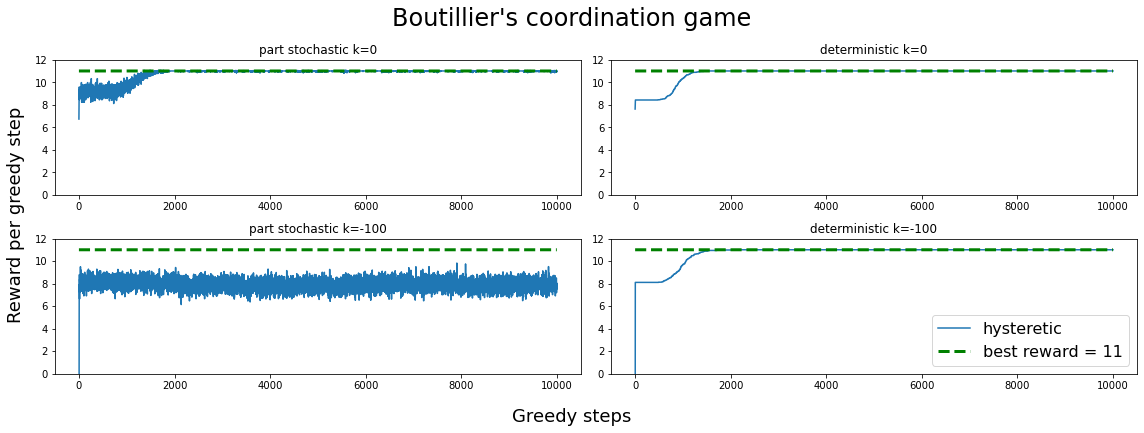

In [69]:
# fig = plt.figure(figsize=(16,6))
keys = ["part stochastic", "deterministic"]
k_vals = [0, -100]

# keys = ["part stochastic"]
# k_vals = [0]

fig, axs = plt.subplots(2, 2, figsize=(16, 6) )

for i in range(len(keys)):
    for j in range(len(k_vals)):
        key = keys[i]
        k = k_vals[j]
        ax = axs[j][i]
        
        x = np.array(range(10000))
#         for data in rewards[key]["k={}".format(k)]:
#         # data = rewards["deterministic"]["k=0"]
#             ax.plot(x, data, alpha=0.05, color='orange')
            
        ax.plot(x, np.mean(rewards[key]["k={}".format(k)], axis=0), label='hysteretic')
#         ax.plot(range(10000), np.average(random_rewards[key]["k={}".format(k)], axis=0), label='random')
        ax.plot(range(10000), np.repeat(11, 10000), '--', lw=3, label='best reward = 11', color='green')
        ax.set_title("{} k={}".format(key, k))
        
        if(j == 1):
            ax.set_ylim(0, 12)
        else:
            ax.set_ylim(0, 12)
        if(j == 1 and i == 1):
            ax.legend(fontsize=16)
            
        # plt.plot(range(5000), np.repeat(7.62, 5000), '--', lw=3, label='line', color='green')

fig.suptitle('Boutillier\'s coordination game', fontsize=24)
fig.supxlabel('Greedy steps',  fontsize=18)
fig.supylabel('Reward per greedy step', x=0.01, fontsize=18, )

parameters_text = r'$\alpha = 0.1,\gamma=0.9,\epsilon=0.05, \beta=0.01$ in deterministic games and $\beta=0.05$ in stochastic games'
# plt.figtext(0.1, -0.035,s="Averaged over 200 trials with {}. Best possible reward is 11.".format(parameters_text), fontsize=13)
fig.tight_layout()
# plt.ylim(-30, 12)

# Save data

In [ ]:
import pickle
from copy import deepcopy
filename = 'boutillier.pickle'
outfile = open(filename,'wb')
pickle.dump(deepcopy([rewards, random_rewards]), outfile)
outfile.close()